In [0]:
from random import random
from numpy import array
from matplotlib import pyplot
from matplotlib.patches import PathPatch
from matplotlib.path import Path
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
# generate a rectangle with random width and height
def random_rectangle():
  width, height = random(), random()
  points = list()
  # bottom left
  points.append([0.0, 0.0])
  # bottom right
  points.append([width, 0.0])
  # top right
  points.append([width, height])
  # top left
  points.append([0.0, height])
  return points

In [0]:
# plot a rectangle
def plot_rectangle(rect):
  # close the rectangle path
  rect.append(rect[0])
  # define path
  codes = [Path.MOVETO, Path.LINETO, Path.LINETO, Path.LINETO, Path.CLOSEPOLY]
  path = Path(rect, codes)
  axis = pyplot.gca()
  patch = PathPatch(path)
  # add shape to plot
  axis.add_patch(patch)
  axis.set_xlim(-0.1,1.1)
  axis.set_ylim(-0.1,1.1)
  pyplot.show()

In [0]:
# generate input and output sequences for one random rectangle
def get_samples():
  # generate rectangle
  rect = random_rectangle()
  X, y = list(), list()
  # create input output pairs for each coordinate
  for i in range(1, len(rect)):
    X.append(rect[i-1])
    y.append(rect[i])
  # convert input sequence shape to have 1 time step and 2 features
  X, y = array(X), array(y)
  X = X.reshape((X.shape[0], 1, 2))
  return X, y

In [0]:
# use a fit LSTM model to generate a new rectangle from scratch
def generate_rectangle(model):
  rect = list()
  # use [0,0] to seed the generation process
  last = array([0.0,0.0]).reshape((1, 1, 2))
  rect.append([[y for y in x] for x in last[0]][0])
  # generate the remaining 3 coordinates
  for _ in range(3):
    # predict the next coordinate
    yhat = model.predict(last, verbose=0)
    # use this output as input for the next prediction
    last = yhat.reshape((1, 1, 2))
    # store coordinate
    rect.append([[y for y in x] for x in last[0]][0])
  return rect

In [0]:
# define model
model = Sequential()
model.add(LSTM(10, input_shape=(1, 2)))
model.add(Dense(2, activation='linear'))
model.compile(loss='mae', optimizer='adam')
model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10)                520       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 22        
Total params: 542
Trainable params: 542
Non-trainable params: 0
_________________________________________________________________


In [11]:
# fit model
for i in range(25000):
  X, y = get_samples()
  model.fit(X, y, epochs=1, verbose=2, shuffle=False)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/1





 - 1s - loss: 0.6030
Epoch 1/1
 - 0s - loss: 0.6987
Epoch 1/1
 - 0s - loss: 0.3604
Epoch 1/1
 - 0s - loss: 0.4584
Epoch 1/1
 - 0s - loss: 0.0773
Epoch 1/1
 - 0s - loss: 0.2085
Epoch 1/1
 - 0s - loss: 0.4554
Epoch 1/1
 - 0s - loss: 0.5487
Epoch 1/1
 - 0s - loss: 0.3748
Epoch 1/1
 - 0s - loss: 0.0634
Epoch 1/1
 - 0s - loss: 0.3593
Epoch 1/1
 - 0s - loss: 0.2851
Epoch 1/1
 - 0s - loss: 0.4352
Epoch 1/1
 - 0s - loss: 0.5240
Epoch 1/1
 - 0s - loss: 0.3366
Epoch 1/1
 - 0s - loss: 0.3669
Epoch 1/1
 - 0s - loss: 0.2530
Epoch 1/1
 - 0s - loss: 0.1912
Epoch 1/1
 - 0s - loss: 0.6284
Epoch 1/1
 - 0s - loss: 0.4056
Epoch 1/1
 - 0s - loss: 0.1628
Epoch 1/1
 - 0s - loss: 0.4474
Epoch 1/1
 - 0s - loss: 0.3831
Epoch 1/1
 - 0s - loss: 0.3660
Epoch 1/1
 - 0s - loss: 0.3163
Epoch 1/1
 - 0s - loss: 0.2583
Epoch 1/1
 - 0s - loss: 0.2622
Epoch 1/1
 - 0s - loss: 0.3098
Epoch 1/1
 - 0s - loss: 0.5293

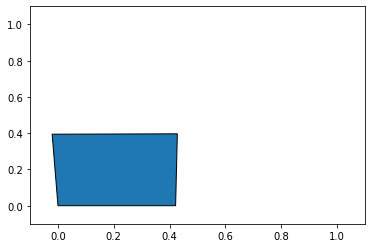

In [15]:
# generate new shapes from scratch
rect = generate_rectangle(model)
plot_rectangle(rect)

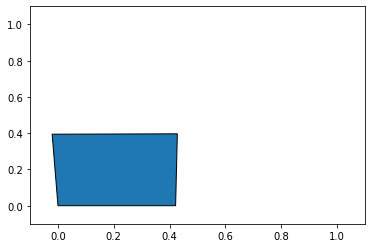

In [16]:
# generate new shapes from scratch
rect = generate_rectangle(model)
plot_rectangle(rect)